### Convolutional Neural Networks (CNNs): Step by step

Welcome to Course 4's first assignment! In this asssignment, you will implement convolutional (CONV) and pooling layers in numpy, including both forward and backward propagation. 

By the end of this notebook, you'll be able to:
1. Explain the convolution operation
2. Apply two different types of pooling operation
3. Identify the compoments used in a convolutional neural network (padding, stride, filter, .....) and their purpose
4. Build a convolutional neural network 

**Notation**:

- Superscript $[l]$ denotes an object of the $l^{th}$ layer. 
    - Example: $a^{[4]}$ is the $4^{th}$ layer activation. $W^{[5]}$ and $b^{[5]}$ are the $5^{th}$ layer parameters.


- Superscript $(i)$ denotes an object from the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example input.
    
    
- Subscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the activations in layer $l$, assuming this is a fully connected (FC) layer.
    
    
- $n_H$, $n_W$ and $n_C$ denote respectively the height, width and number of channels of a given layer. If you want to reference a specific layer $l$, you can also write $n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$. 
- $n_{H_{prev}}$, $n_{W_{prev}}$ and $n_{C_{prev}}$ denote respectively the height, width and number of channels of the previous layer. If referencing a specific layer $l$, this could also be denoted $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$. 

You should be familiar with `numpy` and/or have completed the previous courses of the specialization. Let's get started!


## 1-Packages

Let's first import all the packages that you will need during this assignment.
- numpy is the fundamental package for scientific computing with Python.
- matplotlib is a library to plot graphs in Python.
- np.random.seed(1) is used to keep all the random function calls consistent. 


In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(1)

In [4]:
%load_ext autoreload
%autoreload 2

### 2-Outline of the Assignmeent

You will be implementing the buiding blocks of a convolutional neural network! Each function you will implement will have detailed instructions to walk you through the steps:

- Convolutional functions, including: 
  - Zero padding
  - Convolve window
  - Convolution forward
  - Convolution backward(optional)
  
- Pooling functions, including:
  - Pooling forward
  - Create mask
  - Distribute value
  - Pooling backward(optional)

This notebook will ask you to implement these function from scratch in numpy. In the next notebook, you will use the TenforFlow equivalents of these functions to build the following model:

<img src="images/model.png" style="width:800px;height:300px;">

**Note**: For every forward function, there is a corresponding backward equivalent. Hence, at every step of your forward module you will store some parameters in a cache. These parameters are used to compute gradients during backpropagation. 

###  3 - Convolutional Neural Networks

Although programming frameworks make convolutions easy to use, they remain one of the hardest concepts to understand in Deep learning. A convolution layer transforms an input volume into an output volume of different size, as shown below. 

<img src="images/conv_nn.png" style="width:350px;height:200px;">

In this part, you will build every step of the convolution layer. You will first implement two helper functions: one for zero padding and the other for computing the convolution function itself. 



#### 3.1 - Zero-Padding

Zero-padding adds zeros around the border of an image. 

<img src="images/PAD.png" style="width:600px;height:400px;">
<caption><center> <u> <font color='purple'> <b>Figure 1</b> </u></font><font color='purple'>  : <b>Zero-Padding</b><br> Image (3 channels, RGB) with a padding of 2. </font> </center></caption>


the main benefits of padding are:

- It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.
- It helps us keep more of the information at the border of an image. without padding, very few values at the next layer would be affected by pixels at the edges of an image.  


**Exercise 1 - zero_pad**

Implement the following function, which pads all the images of a batch of examples X with zeros. Note if you want to pad the array "a" of shape (5,5,5,5,5) with pad = 2 for the 2nd dimension, pad = 3 for the 4th dimension and pad=0 for the rest, you would do:             

```python 
a = np.pad(a, ((0,0),(2,2),(0,0),(3,3),(0,0)), 'constant', constant_values = (0,0))
```
np.pad function documentstion: https://numpy.org/doc/stable/reference/generated/numpy.pad.html

- numpy.pad(array, pad_width, mode='constant', **kwargs)
  - array: array_like, Input array to pad.
  - `pad_width`: specifies the number of values padded to the edges of each axis.
    - A single integer, Number of values padded to the edges of each axis.
    - A tuple of two integers, apply this tuple to each axes.
    - A tuple of tuples, specifiying the pad widths for each axis.
  - mode: str, The method used to pad the array.
    - 'constant': Pads with a constant value.
    - 'edge' or 'nesrest': Pads with the edge values of array.
    - 'linear_ramp': Pads with the linear ramp between end_value and the array edge value.
  -kwargs: Additional keyword arguments to pass to the padding function.
    - constant_values: Used in 'constant' mode, the values to set the padded values for each axis. 
      - A single int: sets all padded values to the same value.
      - A tuple of two ints: (before, after) values for each axis.
      - A tuple of tuples: specifiying the before and after values for each axis.




In [5]:
## GRADE FUNCTION: zero_pad

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = (0,0))
    ### END CODE HERE ###
    
    return X_pad

x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
All tests passed!


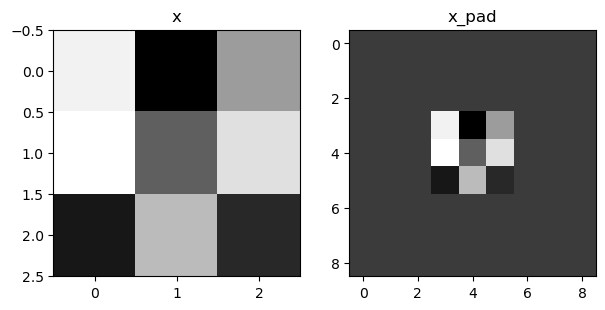

In [6]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)


x_pad = zero_pad(x, 3)
# print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])
zero_pad_test(zero_pad)

### 3.2 - Single Step of Convolution
In this part, implement a single step of convolution, in which you apply the filter to a single position of the input. This will be used to build a convolutional unit, which: 
- Take an input volume
- Applies a filter at every position of the input
- Outputs another volume (usually a different size)

<img src="images/Convolution_schematic.gif" style="width:500px;height:300px;">
<caption><center> <u> <font color='purple'> <b>Figure 2</b> </u><font color='purple'>  : <b>Convolution operation</b><br> with a filter of 3x3 and a stride of 1 (stride = amount you move the window each time you slide) </center></caption>


In a compute vision application, each value in the matrix on the left corresponds to a single pixel value. you convolve a 3*3 filter with the image by multiplying its values element-wise with the original matrix, then summing them up and adding a filter to just one of the positions to get a single real-valued output.

**Exercise 2 - conv_single_step**

**Note**: The variable b will be passed in as a numpy array. if you add a scalar to a numpy array, the result is a numpy array. in the special case of a numpy arrary containing a single value, you can cast it as a float to convert it to a scalar. 


<font color='red'>

回顾向量和矩阵乘法的运算

</font>

1. 点积：
    - 别名为数量积，或者内积。 参与对象为两个维度相同的向量。
    - 运算方式： 对应位置的元素相乘，然后将所有乘积结果相加，得到一个标量值。
    - 公式表示： 对于两个向量 A 和 B，其点积表示为 A · B = Σ (A_i * B_i)，其中 i 遍历向量的所有维度。
    - 几何意义： 点积可以用来衡量两个向量之间的相似度，或者一个向量在另一个向量方向上的投影长度。
2. 矩阵乘法：
    - 别名为矩阵积，参与对象为两个矩阵。
    - 运算方式： 第一个矩阵的行与第二个矩阵的列进行点积运算，得到结果矩阵的对应元素。
    - 公式表示： 对于两个矩阵 A (m x n) 和 B (n x p)，其乘积 C (m x p) 的元素表示为 C_ij = Σ (A_ik * B_kj)，其中 k 遍历 A 的列和 B 的行。
    - 几何意义： 矩阵乘法可以看作是对线性变换的组合，描述了如何将一个空间中的向量映射到另一个空间。



In [15]:
a = np.array([1,2,3])
b = np.array([4,5,6])

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[0,1,0],[2,3,0],[0,4,0]])

In [20]:
### np.dot ###
# inner product of vectors a and b
dot_product = np.dot(a,b)
print("dot_product = " + str(dot_product))
# matrix multiplication of A and B
matrix_product = np.dot(A,B)
print("matrix_product = \n" + str(matrix_product))

### np.matmul  /  @ ###
# matrix multiplication of A and B
matrix_product2 = np.matmul(A,B)
print("matrix_product2 = \n" + str(matrix_product2))
matrix_product3 = A @ B
print("matrix_product3 = \n" + str(matrix_product3))   

### np.multiply / * ###
# element-wise multiplication
elementwise_product = np.multiply(A,B)
print("elementwise_product = \n" + str(elementwise_product))
elementwise_product2 = A * B
print("elementwise_product2 = \n" + str(elementwise_product2))
 

dot_product = 32
matrix_product = 
[[ 4 19  0]
 [10 43  0]
 [16 67  0]]
matrix_product2 = 
[[ 4 19  0]
 [10 43  0]
 [16 67  0]]
matrix_product3 = 
[[ 4 19  0]
 [10 43  0]
 [16 67  0]]
elementwise_product = 
[[ 0  2  0]
 [ 8 15  0]
 [ 0 32  0]]
elementwise_product2 = 
[[ 0  2  0]
 [ 8 15  0]
 [ 0 32  0]]


In [ ]:
## GRADE FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    
    Returns:
    Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    s = a_slice_prev * W
    Z = np.sum(s)
    Z = Z + float(b)
    ### END CODE HERE ###
    
    return Z

In [8]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)
conv_single_step_test(conv_single_step)

assert (type(Z) == np.float64), "You must cast the output to numpy float type"
assert np.isclose(Z, -6.999089450680221), "Wrong value. Expected -6.999089450680221"

Z = -6.999089450680221
All tests passed!


<a name='3-3'></a>
### 3.3 - Convolutional Neural Networks - Forward Pass

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume: 

<center>
<video width="620" height="440" src="images/conv_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<a name='ex-3'></a>
### Exercise 3 -  conv_forward
Implement the function below to convolve the filters `W` on an input activation `A_prev`.  
This function takes the following inputs:
* `A_prev`, the activations output by the previous layer (for a batch of m inputs); 
* Weights are denoted by `W`.  The filter window size is `f` by `f`.
* The bias vector is `b`, where each filter has its own (single) bias. 

You also have access to the hyperparameters dictionary, which contains the stride and the padding. 

**Hint**: 
1. To select a 2x2 slice at the upper left corner of a matrix "a_prev" (shape (5,5,3)), you would do:
```python
a_slice_prev = a_prev[0:2,0:2,:]
```
Notice how this gives a 3D slice that has height 2, width 2, and depth 3.  Depth is the number of channels.  
This will be useful when you will define `a_slice_prev` below, using the `start/end` indexes you will define.

2. To define a_slice you will need to first define its corners `vert_start`, `vert_end`, `horiz_start` and `horiz_end`. This figure may be helpful for you to find out how each of the corners can be defined using h, w, f and s in the code below.

<img src="images/vert_horiz_kiank.png" style="width:400px;height:300px;">
<caption><center> <u> <font color='purple'> <b>Figure 3</b> </u><font color='purple'>  : <b>Definition of a slice using vertical and horizontal start/end (with a 2x2 filter)</b> <br> This figure shows only a single channel.  </center></caption>




**Reminder**:

The formulas relating the output shape of the convolution to the input shape are:    

$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_C = \text{number of filters used in the convolution}$$
    
For this exercise, don't worry about vectorization! Just implement everything with for loops. 

#### Additional Hints (if you're stuck):
- Use array slicing (e.g. varname[0:1,:,3:5]) for the following variables:
    a_prev_pad, W, b
    - Copy the starter code of the function and run it outside of the defined function, in separate cells. 
    - Check that the subset of each array is the size and dimension that you're expecting. 
- To decide how to get the vert_start, vert_end, horiz_start, horiz_end, remember that these are indices of the previous layer. 
    - Draw an example of a previous padded layer, and the current layer
    - The output layer's indices are denoted by h and w
- Make sure that a_slice_prev has a height, width and depth
- Remember that a_prev_pad is a subset of A_prev_pad
    - Think about which one should be used within the for loops
    
     


In [9]:
## GRADE FUNCTION: conv_forward
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
              numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"  
    
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    ## Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    ## Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
    ## Retrieve information from "hparameters"
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    ## Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor.
    n_H = int((n_H_prev - f + 2 * pad) / stride ) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride ) + 1
    
    ## Initialize the output volume Z with zeros.
    Z = np.zeros((m, n_H, n_W, n_C))
    
    ## Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    ## Loop over the batch of training examples
    ## Select ith training example's padded activation
    ## Loop over vertical axis of output volume
    ## Loop over horizontal axis of output volume
    ## Loop over channels (= #filters) of output volume
    
    for i in range(m):                               # loop over the batch of training examples
        A_prev_pad_i = A_prev_pad[i]                       # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            # Find the vertical axis start and end of the current "slice"
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                # Find the horizontal axis start and end of the current "slice"
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                # Loop over channels (= #filters) of the output volume
                for c in range(n_C):                   # loop over channels of the output volume
                    
                    # Use the corners to define the (3D) slice of A_prev_pad_i
                    a_slice_prev = A_prev_pad_i[vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron
                    weights = W[:, :, :, c]
                    biases = b[:, :, :, c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)
    ### Save informatoin in "cache" for the backpropagation
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [10]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)

conv_forward_test_1(z_mean, z_0_2_1, cache_0_1_2_3)
conv_forward_test_2(conv_forward)


Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]
First Test: All tests passed!
Second Test: All tests passed!


### 4 - Pooling Layer

The pooling (POOL) layer reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input. The two type of pooling are:
- Max-pooling layer: slides an (f, f) window over the input and stores the max value of of the window in the output. 
- Average-pooling layer: slides an (f, f) window over the input and stores the average value of the window in the output.

<table>
<td>
<img src="images/max_pool1.png" style="width:500px;height:300px;">
<td>

<td>
<img src="images/a_pool.png" style="width:500px;height:300px;">
<td>
</table

These pooling layers have no parameters for backpropagation training. However, they have hyperparameters such as the window size `f`. This specifies the height and width of the $f \times f$ window you would compute a *max*  or *average* over.  

### 4.1 - Forward Pooling 
Now, you are going to 

**Exercise 4 - pool_forward**

Impplement the forward pass of the pooling layer. Follow the hints in the comments below. 

**Reminder**: As there is no padding, the formulas binding the output shapeof the pooling to the input shape is: 

$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f}{stride} \Bigr\rfloor +1$$
$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f}{stride} \Bigr\rfloor +1$$
$$n_C = n_{C_{prev}}$$

In [11]:
## GRADE FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
        f -- filter size
        stride -- stride size
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize the output matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ## Steps to calculate pooling output A
    #  sub-procedure 1: loop over the training examples
    #      sub-procedure 2: loop on the vertical axis of the output volume
    #           sub-procedure 3: loop on the horizontal axis of the output volume
    #               sub-procedure 4: loop over the channels of the output volume  
      
    for i in range(m):                       # loop over the training examples
        for h in range(n_H):                 # loop on the vertical axis of the output volume
            ## Find the vertical start and end of the current "slice"
            vert_start = h * stride
            vert_end = vert_start + f
            
            for w in range(n_W):             # loop on the horizontal axis of the output volume
                ## Find the horizontal start and end of the current "slice"
                horiz_start = w * stride
                horiz_end = horiz_start + f
                
                for c in range(n_C):         # loop over the channels of the output volume
                    
                    # Find the slice of A_prev
                    a_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    # Compute the pooling operation on the slice. 
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_slice)
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Make sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C)), "Wrong shape of A"
    
    return A, cache

    

In [12]:
# Case 1: stride of 1
print("CASE 1:\n")
np.random.seed(1)
A_prev_case_1 = np.random.randn(2, 5, 5, 3)
hparameters_case_1 = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev_case_1, hparameters_case_1, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A, cache = pool_forward(A_prev_case_1, hparameters_case_1, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])

pool_forward_test_1(pool_forward)

# Case 2: stride of 2
print("\n\033[0mCASE 2:\n")
np.random.seed(1)
A_prev_case_2 = np.random.randn(2, 5, 5, 3)
hparameters_case_2 = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev_case_2, hparameters_case_2, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A, cache = pool_forward(A_prev_case_2, hparameters_case_2, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

pool_forward_test_2(pool_forward)

CASE 1:

mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
All tests passed!

CASE 2:

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
All tests passed!


<font color='blue'>

**What you should remember**:
* A convolution extracts features from an input image by taking the dot product between the input data and a 3D array of weights (the filter)
* The 2D output of the convolution is called the feature map
* A convolution layer is where the filter slides over the image and computes the dot product
  - This transforms the input volume into an output volume of different size
* Zero-padding helps keep more inforamtion at the image borders, and is helpful for building deeper networks, because you can build a CONV layer without shrinking the height/width of the input volume.
* Pooling layers gradually reduce the height and width of the input by sliding a 2D window over each specific region, then summarizing the features in that region (by taking the max or average). 

**Congratulations!** 
You have now implemented the forward pass of the convolutional and pooling layers. 

The reminder of this notebook is optional and will not be graded. If you carry on, just remember to submit the assignment before you proceed to the next notebook! 